Here, I am using a dataset on mushrooms to create a subset of mushroom features that will later be used to potentially predict whether a mushroom is poisonous or not! 

In [20]:
import pandas as pd
# Data was downloaded from UCI website and converted to a CSV. I was having issues importing in other ways.
# Columns as defined by the website
columns = [
    "class", "cap_shape", "cap_surface", "cap_color", "bruises", "odor", "gill_attachment",
    "gill_spacing", "gill_size", "gill_color", "stalk_shape", "stalk_root", "stalk_surface_above_ring",
    "stalk_surface_below_ring", "stalk_color_above_ring", "stalk_color_below_ring", "veil_type",
    "veil_color", "ring_number", "ring_type", "spore_print_color", "population", "habitat"
]
df = pd.read_csv("~/is362/Week 13 Assignment/mushroom.csv", header=None, names=columns)
print(df.head())

  class cap_shape cap_surface cap_color bruises odor gill_attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill_spacing gill_size gill_color  ... stalk_surface_below_ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk_color_above_ring stalk_color_below_ring veil_type veil_color  \
0                      w                      w         p          w   
1       

Great! That worked. Let's cut the data down to a few columns of interest. We will include if its poisonous or not (class), odor, and cap color for this analysis.

In [24]:
df_subset = df[['class', 'odor', 'cap_color']]
print(df_subset.head())

  class odor cap_color
0     p    p         n
1     e    a         y
2     e    l         w
3     p    p         w
4     e    n         g


Let's now convert the letters to numeric values for downstream analysis. Odors and cap colors are automatically assigned categorical number values depending on their unicode (?) values. These numbers can then later be correlated back to each of the original variables.

In [26]:
# Class: edible = 0, poisonous = 1
df_subset = df[['class', 'odor', 'cap_color']]
df_subset.loc[:, 'class'] = df_subset['class'].map({'e': 0, 'p': 1})

# Convert odor and cap color to numeric values
df_subset.loc[:, 'odor'] = df_subset['odor'].astype('category').cat.codes
df_subset.loc[:, 'cap_color'] = df_subset['cap_color'].astype('category').cat.codes
print(df_subset.head())

  class odor cap_color
0     1    6         4
1     0    0         9
2     0    3         8
3     1    6         8
4     0    5         3


Let's now do some basic data analysis looking at distribiution of these three above variables.

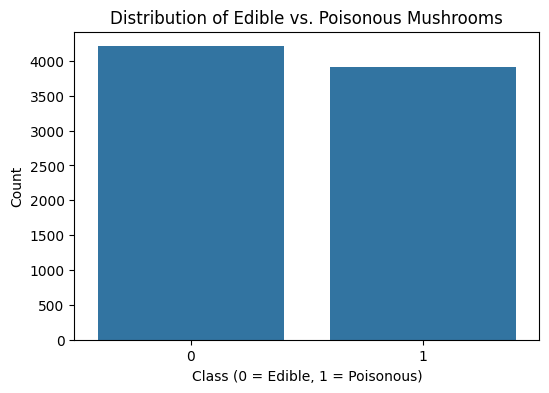

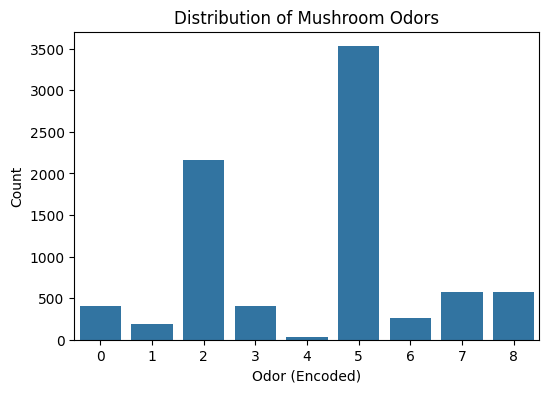

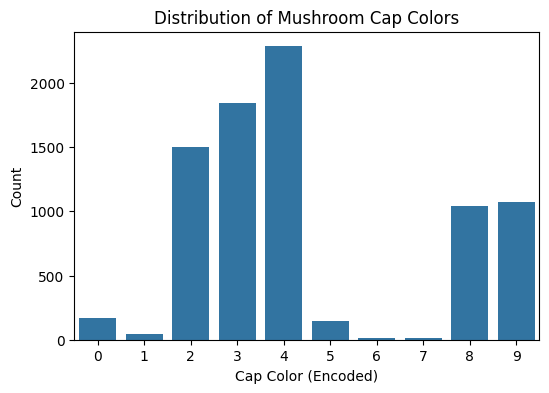

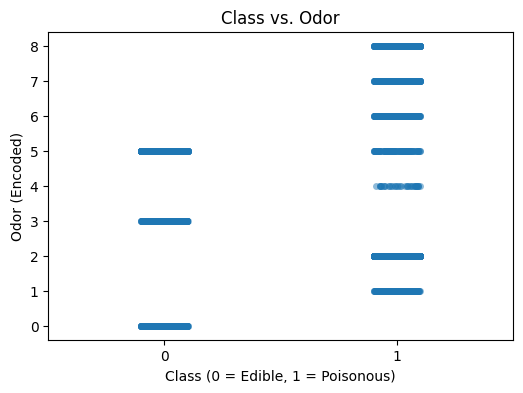

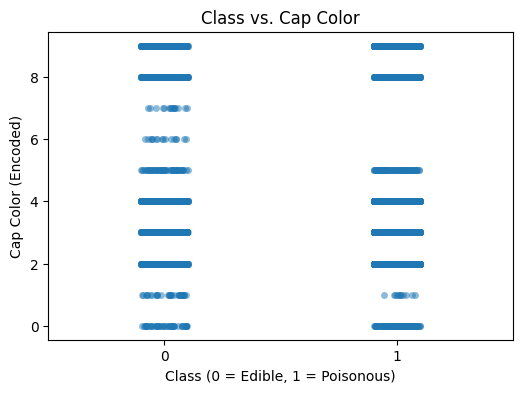

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of class
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df_subset)
plt.title('Distribution of Edible vs. Poisonous Mushrooms')
plt.xlabel('Class (0 = Edible, 1 = Poisonous)')
plt.ylabel('Count')
plt.show()

# Distribution of odor
plt.figure(figsize=(6, 4))
sns.countplot(x='odor', data=df_subset)
plt.title('Distribution of Mushroom Odors')
plt.xlabel('Odor (Encoded)')
plt.ylabel('Count')
plt.show()

# Distribution of cap_color
plt.figure(figsize=(6, 4))
sns.countplot(x='cap_color', data=df_subset)
plt.title('Distribution of Mushroom Cap Colors')
plt.xlabel('Cap Color (Encoded)')
plt.ylabel('Count')
plt.show()

# Scatterplot of class vs odor
plt.figure(figsize=(6, 4))
sns.stripplot(x='class', y='odor', data=df_subset, jitter=True, alpha=0.5)
plt.title('Class vs. Odor')
plt.xlabel('Class (0 = Edible, 1 = Poisonous)')
plt.ylabel('Odor (Encoded)')
plt.show()

# Scatterplot of class vs cap_color
plt.figure(figsize=(6, 4))
sns.stripplot(x='class', y='cap_color', data=df_subset, jitter=True, alpha=0.5)
plt.title('Class vs. Cap Color')
plt.xlabel('Class (0 = Edible, 1 = Poisonous)')
plt.ylabel('Cap Color (Encoded)')
plt.show()

It seems that there are slightly more edible mushrooms then there are poisonous mushrooms in this dataset. The cap color that shows up the most frequently is 4 where you can't really tell based on that alone if the mushroom is edible or poisonous. However, cap colors 6 and 7 show up the least and it turns out that every mushroom with these colors are edible! Cap color could be ONE factor to predict edible vs poisonous mushrooms. Mushroom odor 5 shows up the most and some are poisonous and others are edible, so again, can't tell here. However, mushroom odor 4 shows up the least and it turns out that all mushrooms that smell like 4 are poisonous. Thus, mushroom odor could be another factor to predict edible vs poisonous mushrooms. See below for a decoding analysis of what each encoded number refers to.

In [34]:
# Code based on unicode values (basically it's in alphabetical order with earlier letters being lower numbers)
class_map = {0: 'edible', 1: 'poisonous'}
odor_map = {
    0: 'almond', 1: 'anise', 2: 'creosote', 3: 'fishy', 4: 'foul', 
    5: 'musty', 6: 'none', 7: 'pungent', 8: 'spicy'
}
cap_color_map = {
    0: 'brown', 1: 'buff', 2: 'cinnamon', 3: 'gray', 4: 'green', 
    5: 'pink', 6: 'purple', 7: 'red', 8: 'white', 9: 'yellow'
}